# Inferential statistics
## Part III - Inferential Analysis

We're now going to look for answers to the ongoing basketball discussions between you and your family. The main ones we want to reasearch are the following:

- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

Let's investigate these claims and see if we can find proof to refute or support them.

### Libraries
Import the necessary libraries first.

In [1]:
# Libraries
import math
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import sem
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
pd.set_option('max_columns', 50)

### Load the dataset

Load the cleaned dataset.

In [2]:
#your code here
wnba = pd.read_csv('wnba_clean.csv')

In [3]:
wnba.head()

,Unnamed: 0,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0


# Question 1: Can my sister play in a professional female basketball league?

As we said, you grandmother is convinced that your sister couldn't play in a professional league because of her physique and weight (her weight is 67kg). 

To find an actual answer to the question we first need to know what's the average weight of a professional female basketball player. The data we have only refers to the WNBA league and not to every female professional basketball league in the world, therefore we have no way of actually calculating it.

Still, given that we do have *some* data we can **infer** it using a sample of players like the one we have. 

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the average weight. Do you feel it actually fulfills those requirements? Do you need to make any assumptions? We could calculate a confidence interval to do the inference, but do you know any other ways?**

In [4]:
# your answer here

"""
First I would calculate the average height of an NBA player then calculate the confidence intervale to infere for 
the mean height of a basketball player.

"""

'\nFirst I would calculate the average height of an NBA player then calculate the confidence intervale to infere for \nthe mean height of a basketball player.\n\n'

**Now that all the requirements have been taken into account, compute the confidence interval of the average weight with a confidence level of 95%.**

In [5]:
# your code here
weight_sample = wnba['Weight']

## if i print(weight_sample)  I get: TypeError: 'numpy.int64' object is not callable
loc = weight_sample.mean()
scale = sem(weight_sample)

c_int = stats.t.interval(alpha = 0.95 , df = len(weight_sample)-1, loc=loc, scale=scale)
c_int

(77.15461406720749, 80.80313241166576)

**What can you say about these results?**

In [6]:
#your-answer-here

"""
These results show that with a confidence level of 95% the mean of a basketball player in the holl world is about 
between 77,15 kg and 80.80 Kg.
"""

'\nThese results show that with a confidence level of 95% the mean of a basketball player in the holl world is about \nbetween 77,15 kg and 80.80 Kg.\n'

**If your sister weighs 67kg what would you tell your grandmother in regards to her assumption?**

In [7]:
#your-answer-here
"""I would tell here that she would be right about 95% of the time that my sister would not be able to be a basketball
player unless she gains some wheight"""

'I would tell here that she would be right about 95% of the time that my sister would not be able to be a basketball\nplayer unless she gains some wheight'

## Bonus: Can you plot the probability distribution of the average weight, indicating where the critical region is?

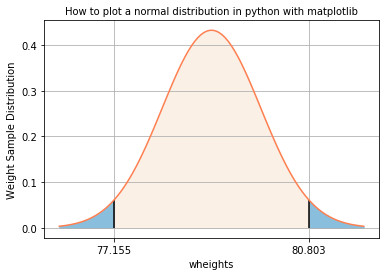

In [8]:
# your code here

lower = c_int[0]
upper = c_int[1]
mean = loc
std = scale

normal = stats.norm(mean, std)

x = np.linspace(normal.ppf(0.001),normal.ppf(0.999), 100)


plt.plot(x,normal.pdf(x), color='coral')

plt.grid()

## space to fill -- lower (rejection zone)
ptx = np.linspace(normal.ppf(0.001), normal.ppf(0.025), 100)
### for my x values make a normal distribution with the mean equal to the mean of my weight sample distribution, and its STD error
pty = normal.pdf(ptx)

## space to fill -- upper (rejection zone)
ptx2 = np.linspace(normal.ppf(0.975), normal.ppf(0.999), 100)
### for my x values make a normal distribution with the mean equal to the mean of my weight sample distribution, and its STD error
pty2 = normal.pdf(ptx2)

## space to fill -- critical region
ptx3 = np.linspace(normal.ppf(0.025), normal.ppf(0.975), 100)
### for my x values make a normal distribution with the mean equal to the mean of my weight sample distribution, and its STD error
pty3 = normal.pdf(ptx3)




plt.vlines(lower, 0, normal.pdf(lower))
plt.vlines(upper, 0, normal.pdf(upper))

##Filling areas 

plt.fill_between(ptx, pty, color='#89bedc', alpha='1.0')
plt.fill_between(ptx2, pty2, color='#89bedc', alpha='1.0')
plt.fill_between(ptx3, pty3, color='linen', alpha='1.0')

#indicate the values of our interval 
plt.xticks(c_int)

## labels
plt.xlabel('wheights')
plt.ylabel('Weight Sample Distribution')

##Title
plt.title('How to plot a normal distribution in python with matplotlib',fontsize=10)



plt.show()

# Question 2: Do female professional basketball players fail the majority of their free throws?

You do not agree with your sister when she says that most female players fail their free throws. You decide to try and estimate the percentage of players that fail more than 40% of their free throws using, you guessed it, the WNBA sample.

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the proportion of players that miss more than 40% of their free throws. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [9]:
# your answer here
"""
I Would calculate the porportion of freethrows missed than plot its distribution and see between the confidence intervale
if that range is includes the majority. more than 50%

"""


'\nI Would calculate the porportion of freethrows missed than plot its distribution and see between the confidence intervale\nif that range is includes the majority. more than 50%\n\n'

**Now that all the requirements have been taken into account, compute the confidence interval of the proportion with a confidence level of 95%:**

In [10]:
# your code here

from statsmodels.stats.proportion import proportion_confint

trials = len(wnba['FT%'])

porp_inter = proportion_confint(len(wnba.loc[wnba['FT%'] < 60 , 'FT%']), nobs = trials , alpha=1 - 0.95 ,  method='normal')

porp_inter

(0.049558988317297346, 0.14762411027425193)

**What can you comment about our result? What would you tell your sister?**

In [11]:
#your-answer-here

"""
We can say that the porportion of players that fail the free throws is wll bellow 50%. Se my sister is wrong.
It is between the confidence interval of 0.049 to 0.147. The ones that fail their free throws are between 
4% and 14%.

"""

'\nWe can say that the porportion of players that fail the free throws is wll bellow 50%. Se my sister is wrong.\nIt is between the confidence interval of 0.049 to 0.147. The ones that fail their free throws are between \n4% and 14%.\n\n'

# Bonus: Can you plot the probability distribution of the proportion of missed free throws, indicating where the critical region is?

Text(0, 0.5, 'frquency')

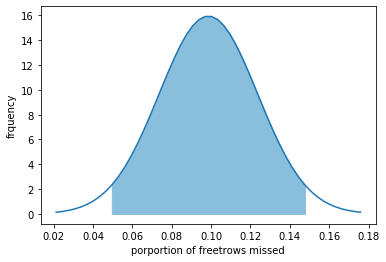

In [12]:
#your code here

ft_miss_more_t_40_mean = len(wnba.loc[wnba['FT%'] < 60 , 'FT%'])/len(wnba['FT%'])
ft_miss_more_t_40_std = np.sqrt((ft_miss_more_t_40_mean*(1-ft_miss_more_t_40_mean))/len(wnba['FT%']))

normal = stats.norm(ft_miss_more_t_40_mean,ft_miss_more_t_40_std)

x_min = normal.ppf(0.001)
x_max = normal.ppf(0.999)
x = np.linspace(x_min, x_max)
y = normal.pdf(x)
plt.plot(x,y)

x_crit = np.linspace(porp_inter[0], porp_inter[1])
y_crit = normal.pdf(x_crit)

plt.fill_between(x_crit, y_crit, color='#89bedc', alpha='1.0')

## labels
plt.xlabel('porportion of freetrows missed')
plt.ylabel('frquency')


# Question 3: Is the average number of assists for WNBA players only higher than the average for WNBA and NBA players together?

Your brother-in-law is convinced that the average assists for female professional players is higher than the average of both female and male players combined (which is 52 for the 2016-2017 season). You would like to actually prove if this is true or not but you remember your stats teacher saying "you can't *prove* anything, you just can say that *you are not* saying foolishness".

**How would you do it? Try and think about the requirements that your sample must satisfy in order to do that. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [13]:
#your-answer-here

"""
My sample needs to be bigger that 30 variables. So I can use teh central limit theorem to say taht the mean of my sampling
distribution as an aproximatly normal distribution and its mean equals to the population mean.
"""


'\nMy sample needs to be bigger that 30 variables. So I can use teh central limit theorem to say taht the mean of my sampling\ndistribution as an aproximatly normal distribution and its mean equals to the population mean.\n'

**Use a two-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [14]:
#your code here
alfa = 0.05

ttest_1samp(wnba['AST'],52)

Ttest_1sampResult(statistic=-2.1499947192482898, pvalue=0.033261541354107166)

In [15]:
#your-answer-here

"""
We can reject the null hypotesis that the average assists for female profissional players is equal to
the higer average of both female and male players combined (52).
We see that the average is lower for the female.

"""

'\nWe can reject the null hypotesis that the average assists for female profissional players is equal to\nthe higer average of both female and male players combined (52).\nWe see that the average is lower for the female.\n\n'

**Now use a one-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [16]:
#your-answer-here

p_val = ttest_1samp(wnba['AST'],52)[1]
p_val/2

0.016630770677053583

In [ ]:
"""
I can't regect the nul hipotesis for a one tailed test with a significace level of 0.05 % Since the significance level is higer
that the p_value. We can say that the average numb of assists for wnba players might be higer that the average
of the average for WNBA and NBA players together.
"""

# Bonus: Can you plot the resulting t-distribution of both tests? Indicate where the is the critical region and where does your statistic fall.**

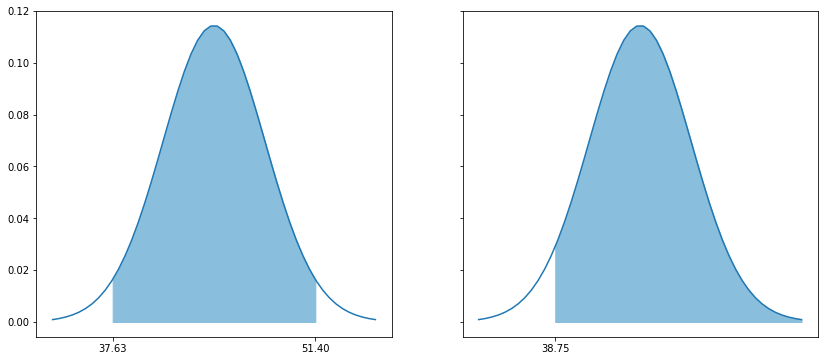

In [47]:
#your code here

## two tailed 

loc = wnba['AST'].mean()
scale = sem(wnba['AST'])
df = len(wnba['AST'])-1

t_dist = stats.t(df,loc, scale)



start = t_dist.ppf(0.001) ## the value of x that has a percentage of 0.001
end = t_dist.ppf(0.999) ## the value of x that has a persentage of 0.999

X = np.linspace(start, end) ## all the value from x (start) to x (end)
y = t_dist.pdf(X)

## confidence interval for wnba assists. with a confidence of 95%

c_int_ass = stats.t.interval(alpha = 0.95 , df = len(wnba['AST'])-1, loc=loc, scale=scale)

lower = c_int_ass[0]
upp = c_int_ass[1]

X_ = np.linspace(lower, upp)
y_ = t_dist.pdf(X_)



#####

lower_1 = t_dist.ppf(0.05)
upper_1 = t_dist.ppf(0.999)

X_1 = np.linspace(lower_1, upper_1)
y_1 = t_dist.pdf(X_1)


## fill the part of the normal distribution that has the mean of the population with a confidence of 95% 
## Two tailed 

fig, axs = plt.subplots(1,2, sharey = True, figsize = (14,6))

axs[0].fill_between(X_, y_, color='#89bedc', alpha='1.0') 

axs[0].set_xticks([t_dist.ppf(0.025),t_dist.ppf(0.975)]) ## because python do the statistical test for a two tailed so we get the values from a ppf = 0.025 to ppf = 0.975

axs[0].plot(X,y)


## ONE tailed 


axs[1].fill_between(X_1, y_1, color='#89bedc', alpha='1.0') 

axs[1].set_xticks([t_dist.ppf(0.05)]) ## probability of average of wnba assists being higher that the the 

axs[1].plot(X,y)



# Bonus: Satisfying your curiosity

You finally managed to solve your family's debates over basketball! While you were doing that you started to take an interest in the normal distribution.

You read that the normal distribution is present in a lot of natural phenomenons, like blood pressure, IQ, weight and height. If, for example, we could plot the distribution of the weights of every human on the planet right now it would have the shape of a normal distribution.

In light of this you would like to see if it's possible to check if the distribution of the weights of the WNBA players is a sample distribution that comes from a population that has a normal distribution, because theoretically this should be the case.

**How would you try to demonstrate that our sample fits a normal distribution? What kind of test would you use? Would you have to make any assumptions?**

In [22]:
#your-answer-here
"""
I would assume that the distribution of the weights of the wnba players are normal distributed. And to check this
I do the godness of fit with the Ks Test to see if it has a normal distribution.
My null hypotesis will be that the wnba weights follow a normal distribution.
"""


In [43]:
# your code here
# alpha = 0.01
loc, scale = stats.norm.fit(wnba['Weight'])

n = stats.norm(loc=loc, scale=scale) # expected 

stats.kstest(wnba['Weight'], n.cdf)

KstestResult(statistic=0.06498961758365632, pvalue=0.5775483597847374)

**What are your comments in regards to the results of the test?**

In [24]:
#your-answer-here


"""
We can't reject tha null hypotesis. So we can say with a confidence of 99% that the wnba weights follow a normal distribution.

"""